### https://docs.google.com/document/d/1hzv9yC5EYxBwqU7L-v6NL_FdfnhCacXztendsc-6n6M/edit?usp=sharing

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
df1 = pd.read_csv("home_data.csv")

In [6]:
df1 = df1.sample(5000)

In [7]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
57,2799800710,20150407T000000,301000,3,2.50,2420,4750,2.0,0,0,...,8,2420,0,2003,0,98042,47.3663,-122.122,2690,4750
17382,641900050,20150206T000000,499950,4,2.25,2160,8817,1.0,0,0,...,7,1460,700,1965,0,98133,47.7595,-122.356,1880,8817
8093,3900500110,20141117T000000,627000,3,2.00,2310,10525,2.0,0,0,...,7,2310,0,1965,0,98033,47.6727,-122.174,1430,10523
16402,4299000130,20140728T000000,341950,5,3.00,3070,5252,2.0,0,0,...,8,3070,0,2005,0,98042,47.3666,-122.128,2760,5203
7488,825049073,20140630T000000,441000,2,1.50,1190,3400,1.0,0,0,...,7,990,200,1919,0,98115,47.6726,-122.320,1410,3150


In [8]:
df1['decade'] = (df1['yr_built'] / 10).astype('int64') * 10

In [9]:
df1.drop(['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [10]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,decade
57,2799800710,20150407T000000,301000,3,2.50,2420,4750,2.0,0,0,3,8,2420,0,2003,0,98042,47.3663,-122.122,2000
17382,641900050,20150206T000000,499950,4,2.25,2160,8817,1.0,0,0,3,7,1460,700,1965,0,98133,47.7595,-122.356,1960
8093,3900500110,20141117T000000,627000,3,2.00,2310,10525,2.0,0,0,5,7,2310,0,1965,0,98033,47.6727,-122.174,1960
16402,4299000130,20140728T000000,341950,5,3.00,3070,5252,2.0,0,0,3,8,3070,0,2005,0,98042,47.3666,-122.128,2000
7488,825049073,20140630T000000,441000,2,1.50,1190,3400,1.0,0,0,3,7,990,200,1919,0,98115,47.6726,-122.320,1910


In [63]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'decade'],
      dtype='object')

## Price distribution

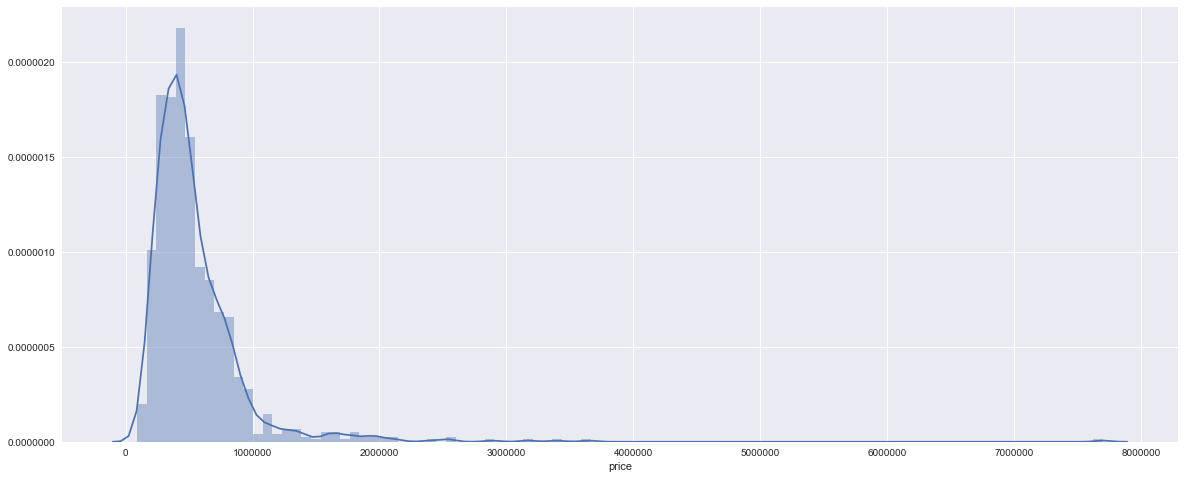

In [70]:
plt.figure(figsize=(20,8))
sns.distplot((df1.sample(1000)['price']), kde=True, bins=100)

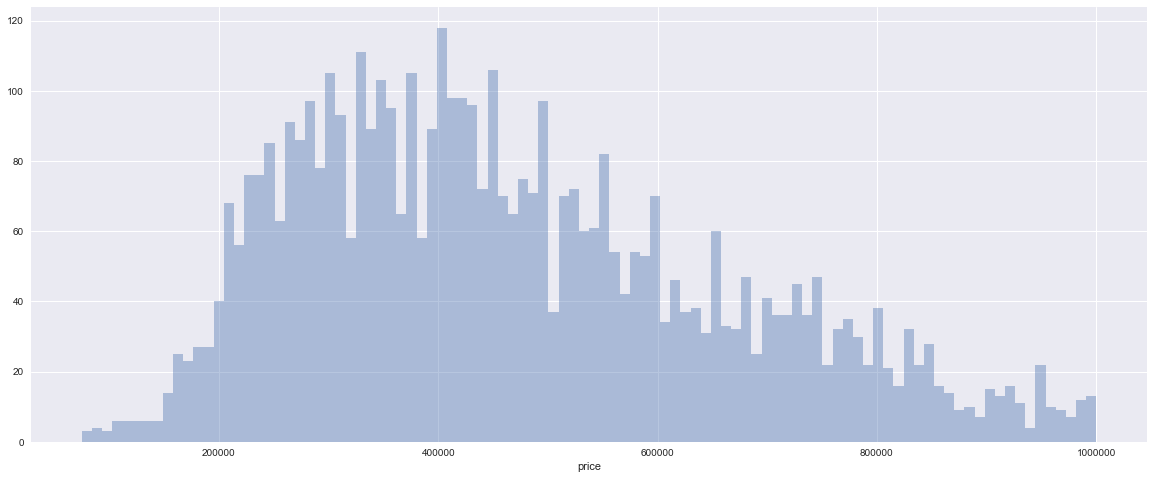

In [12]:
plt.figure(figsize=(20,8))
sns.distplot((df1[df1['price'] <= 1000000]['price']), kde=False, hist=True, bins=100)

## Price / date of built

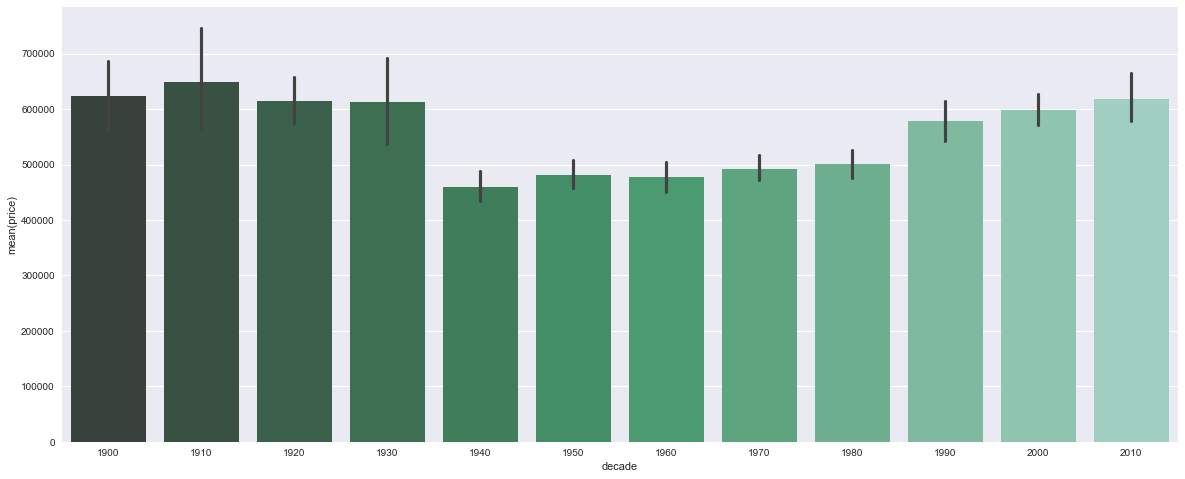

In [13]:
plt.figure(figsize=(20,8))
sns.barplot(df1['decade'], df1['price'], palette="BuGn_d")

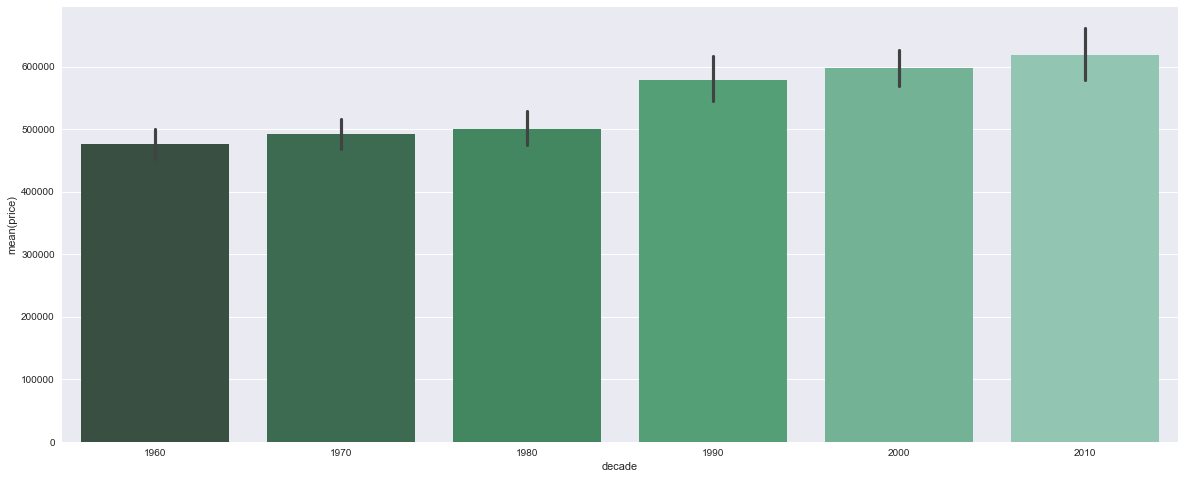

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(df1[df1['decade'] > 1950]['decade'], df1['price'], palette="BuGn_d")

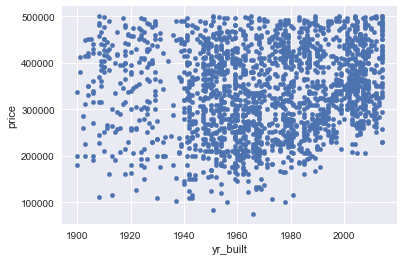

In [15]:
plt.figure(figsize=(12,8))
df1[df1['price'] < 500000].sample(2000).plot.scatter(x='yr_built',y='price')

## Price / LOT Scatter Plot

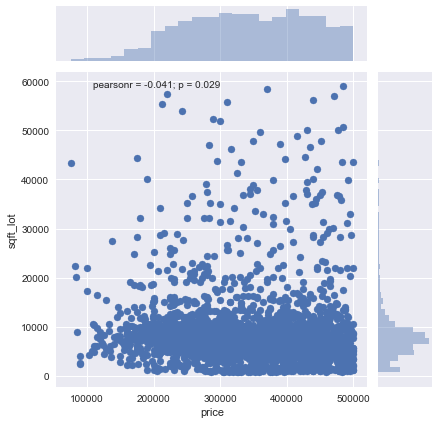

In [16]:
sns.jointplot(x='price',y='sqft_lot',data=df1[(df1['price'] < 500000) & (df1['sqft_lot'] < 60000)],kind='scatter')

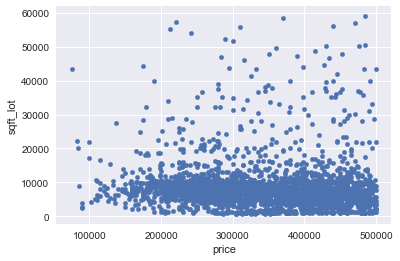

In [17]:
plt.figure(figsize=(12,8))
df1[(df1['price'] < 500000) & (df1['sqft_lot'] < 60000)].plot.scatter(x='price',y='sqft_lot')

## Median/Mean/Count price of properties in each Zip code

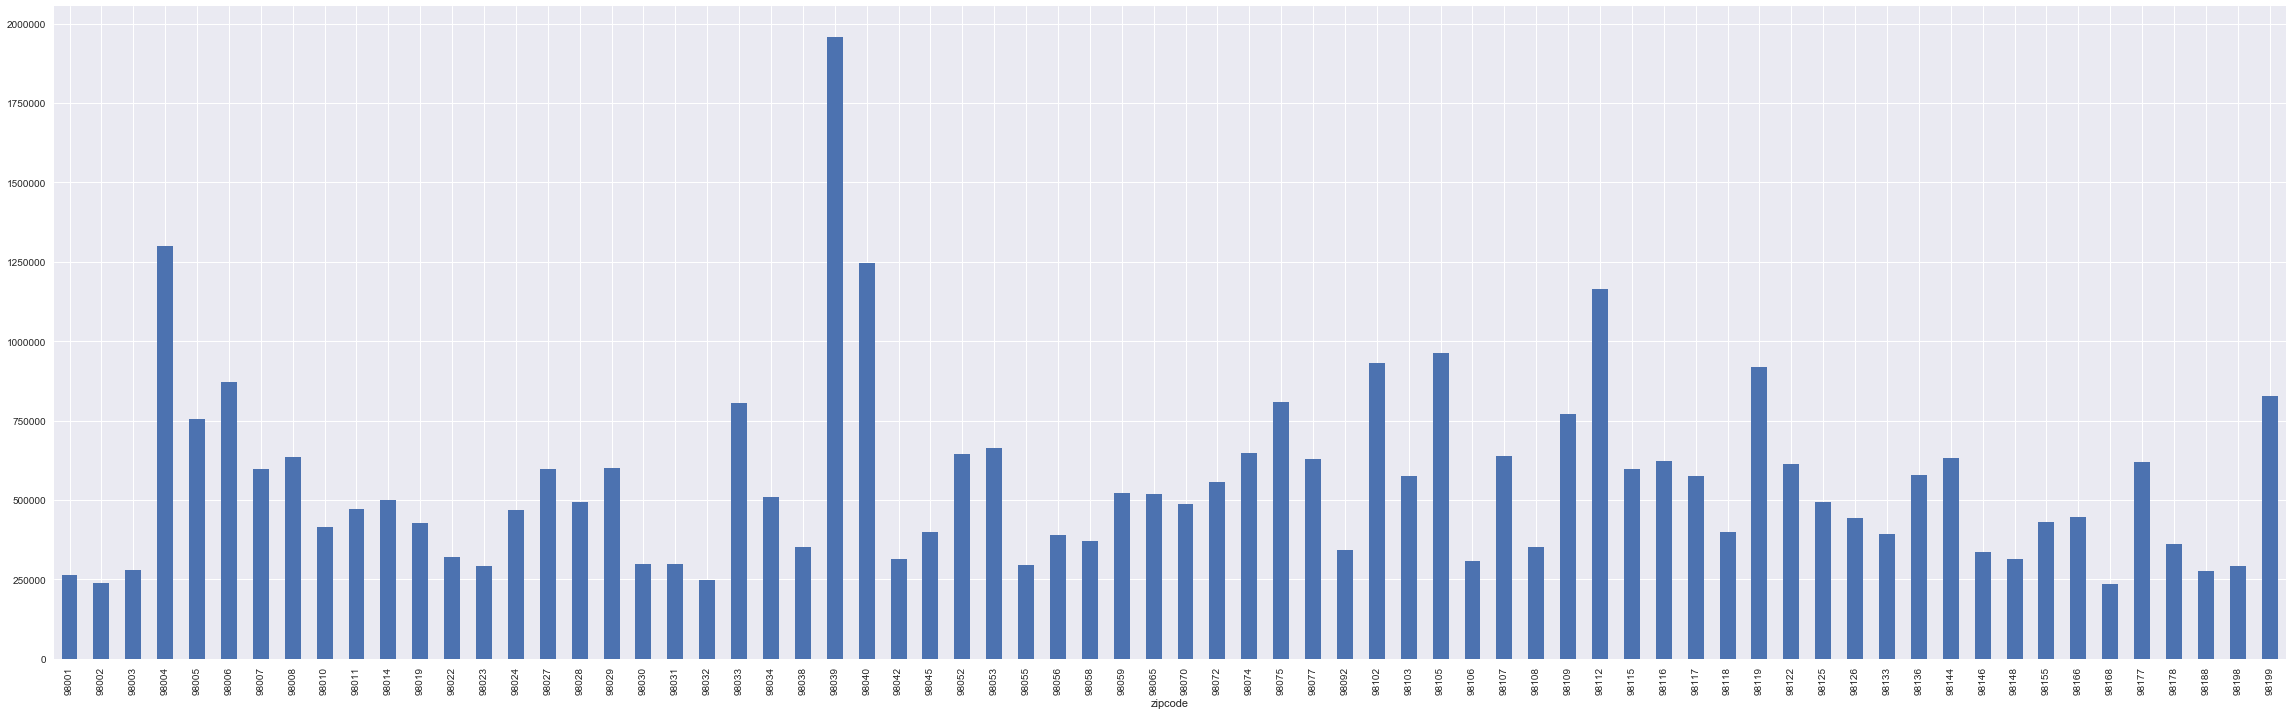

In [18]:
plt.figure(figsize=(40,12))
# by_zipcode = df1.groupby('zipcode').price.agg(['count', 'mean', 'min', 'max'])
df1.groupby('zipcode').price.mean().plot(kind='bar')

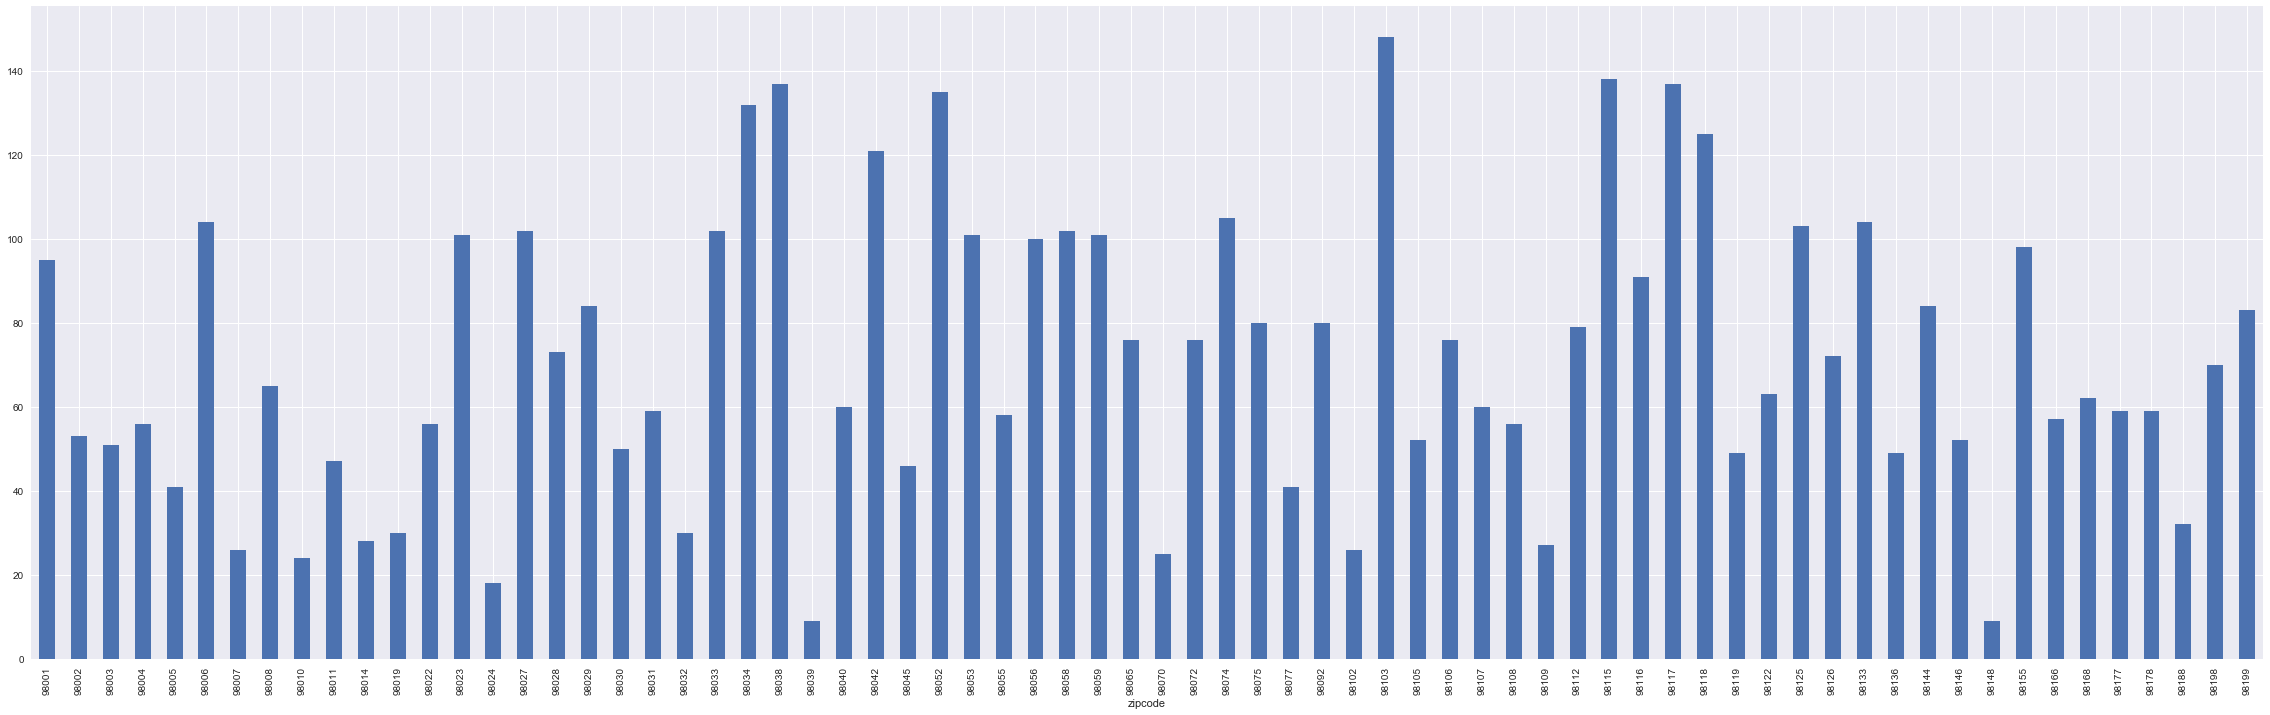

In [19]:
plt.figure(figsize=(40,12))
# by_zipcode = df1.groupby('zipcode').price.agg(['count', 'mean', 'min', 'max'])
df1.groupby('zipcode').price.count().plot(kind='bar')

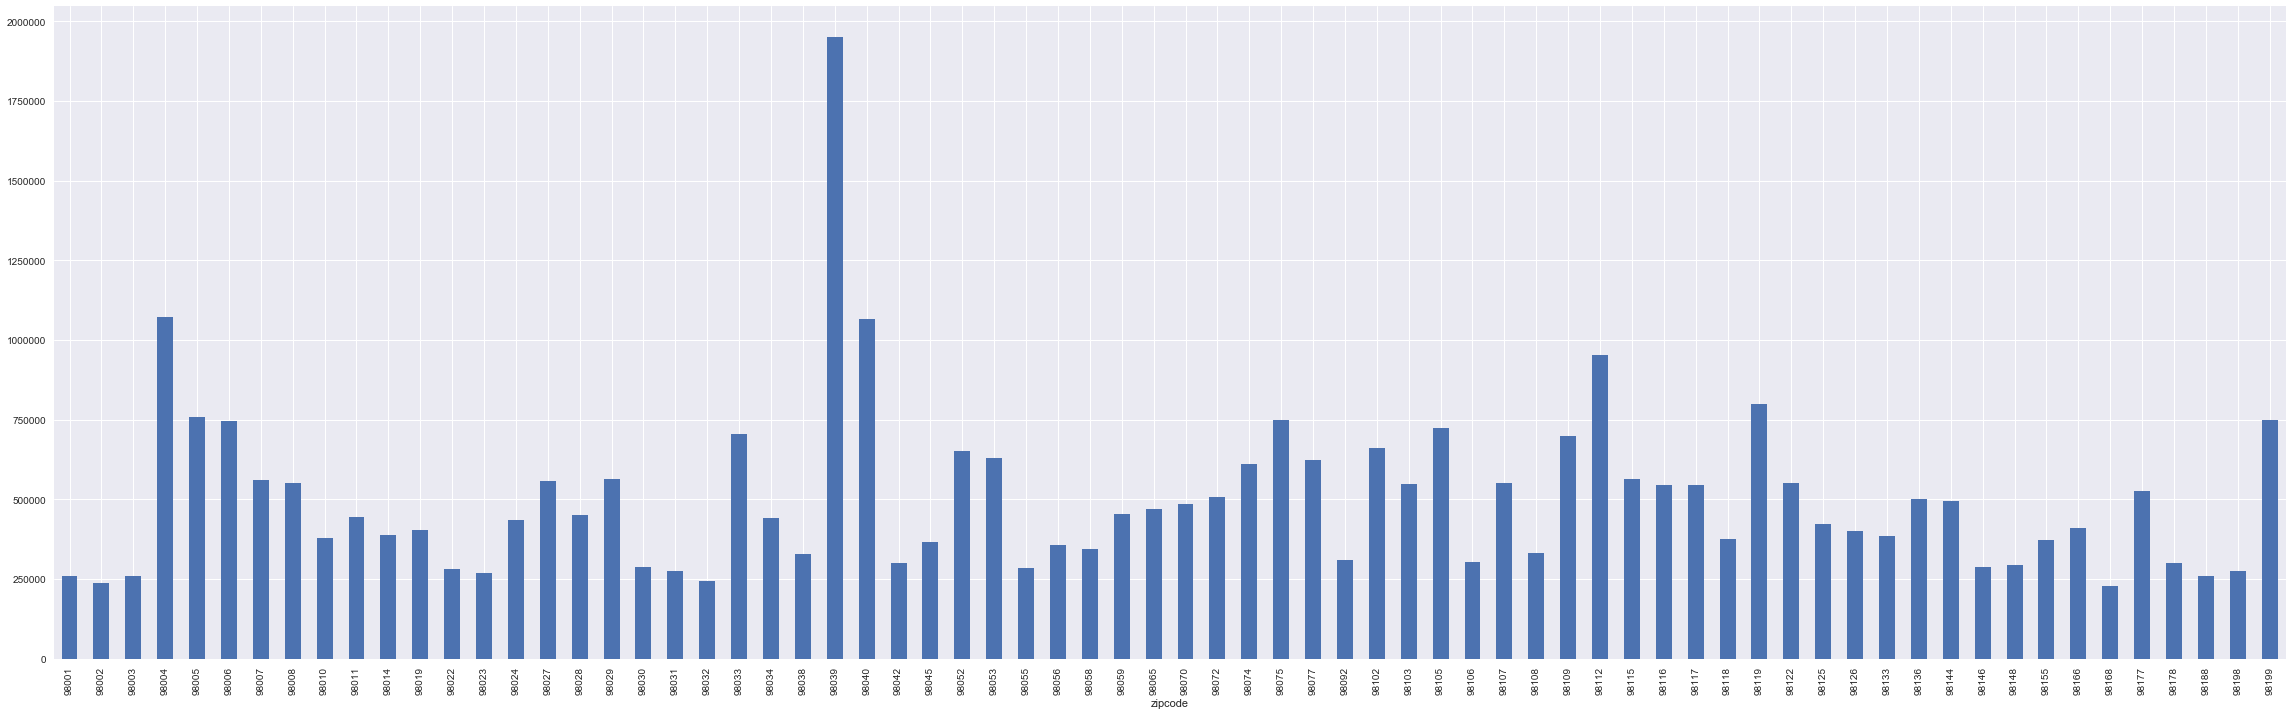

In [20]:
plt.figure(figsize=(40,12))
# by_zipcode = df1.groupby('zipcode').price.agg(['count', 'mean', 'min', 'max'])
df1.groupby('zipcode').price.median().plot(kind='bar')

# Price/Bedrooms

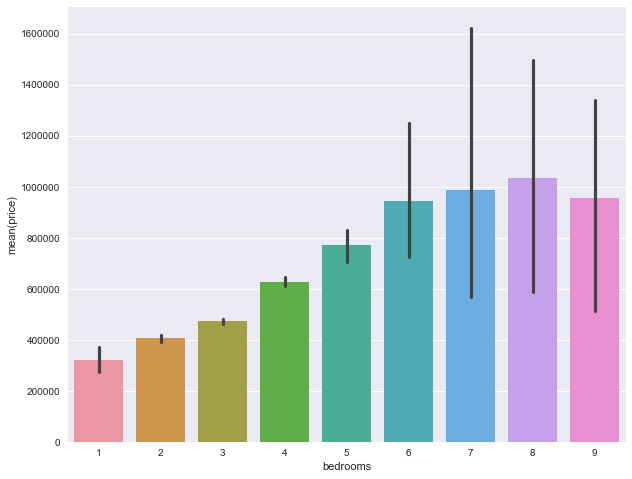

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x='bedrooms',y='price',data=df1)

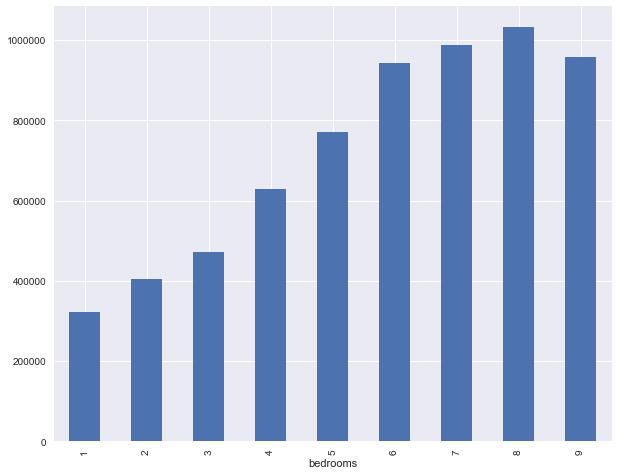

In [22]:
plt.figure(figsize=(10,8))
df1.groupby('bedrooms').price.mean().plot(kind='bar')

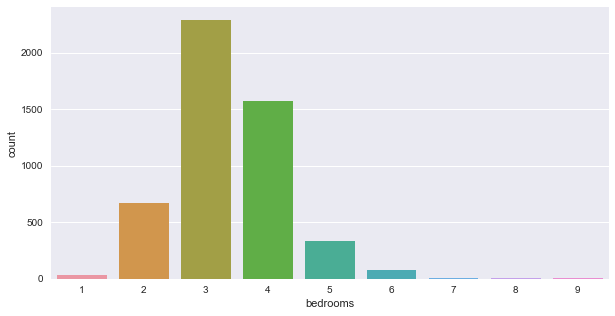

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='bedrooms',data=df1)

## Price/Bedrooms

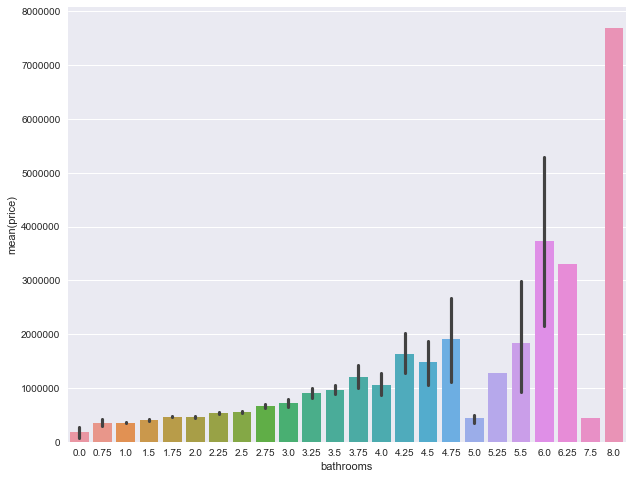

In [85]:
plt.figure(figsize=(10,8))
sns.barplot(x='bathrooms',y='price',data=df1)

In [87]:
df1[(df1['bathrooms'] == 7.5) | (df1['bathrooms'] == 8) | (df1['bathrooms'] == 5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,decade
1660,9126101740,20141204T000000,490000,8,5.0,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1990
20984,2149800278,20141015T000000,343000,6,5.0,2732,7655,2.0,0,0,3,7,2732,0,2009,0,98002,47.3045,-122.211,2000
8546,424049043,20140811T000000,450000,9,7.5,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1990
2345,3185600055,20140611T000000,495000,6,5.0,3440,4500,2.0,0,0,3,8,3280,160,2007,0,98055,47.4871,-122.219,2000
7252,6762700020,20141013T000000,7700000,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,1910


## Other

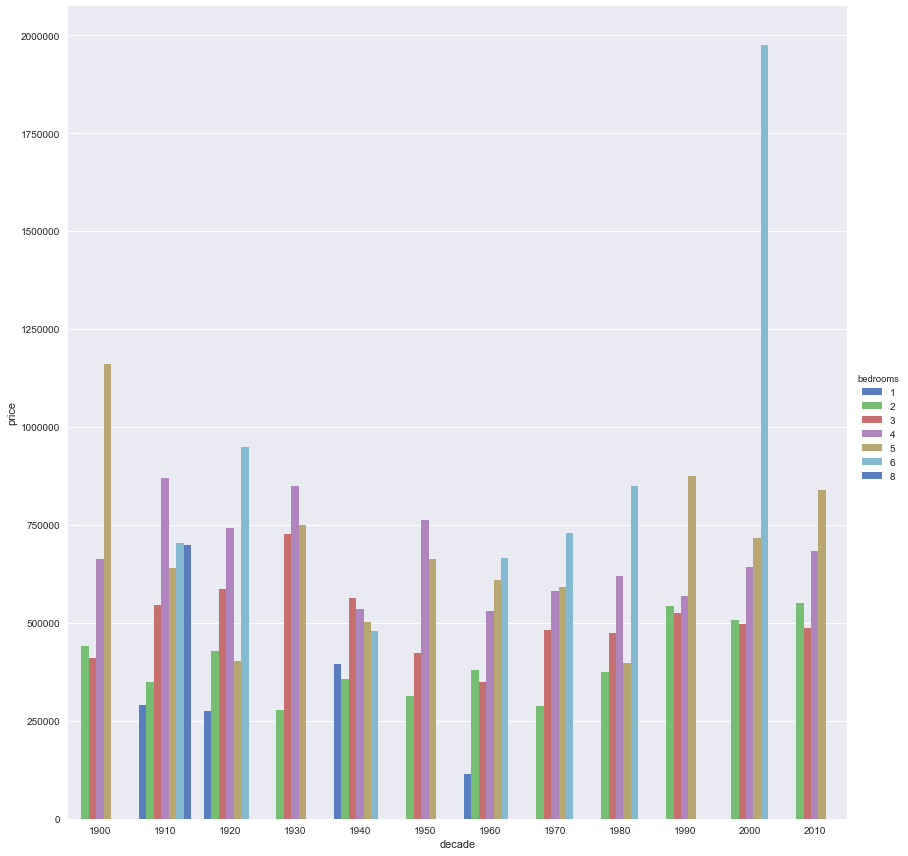

In [66]:
res = df1.sample(1000).drop(['id', 'date','bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement','yr_renovated', 'zipcode',
       'lat', 'long', 'yr_built'], axis=1).groupby(['decade','bedrooms'], as_index=False).mean()
sns.factorplot(x="decade", y="price", hue="bedrooms", data=res,
                   size=12, kind="bar", palette="muted")

# Iplot

In [134]:
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from plotly.graph_objs import *
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [126]:
df1.iplot(kind='bar',x='bedrooms',y='price',size=10)

In [97]:
df1.iplot(kind='bar',x='bathrooms',y='price',size=10)

In [123]:
df1[(df1['price'] < 4000000) & (df1['sqft_lot'] < 50000)].sample(500).iplot(kind='scatter',x='sqft_lot',y='price', mode='markers',size=10, color = ('rgb(20, 150, 250)'))

In [136]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

trace1 = Scatter3d(
    x=df1.sample(500)['year'],
    y=df1.sample(500)['continent'][750:1500],
    z=df1['pop'][750:1500],
    text=df['country'][750:1500],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,
        size=df['gdpPercap'][750:1500],
        color = df['lifeExp'][750:1500],
        colorscale = 'Viridis',
        colorbar = dict(title = 'Life<br>Expectancy'),
        line=dict(color='rgb(140, 140, 170)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='Examining Population and Life Expectancy Over Time')
fig=dict(data=data, layout=layout)
# py.iplot(fig, filename='3DBubble')
# choromap = go.Figure(data = [data],layout = layout)
iplot(fig, filename='3DBubble')